<a href="https://colab.research.google.com/github/dkanh6/Computational_Neuroscience/blob/main/SimulationMapper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving 05_vm_soma.txt to 05_vm_soma (4).txt


interactive(children=(IntRangeSlider(value=(0, 160001), continuous_update=False, description='Range:', max=160…

<function __main__.<lambda>(range, line_style, line_color, show_grid, x_scale, y_scale, x_label, y_label, title, marker_style, show_legend)>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

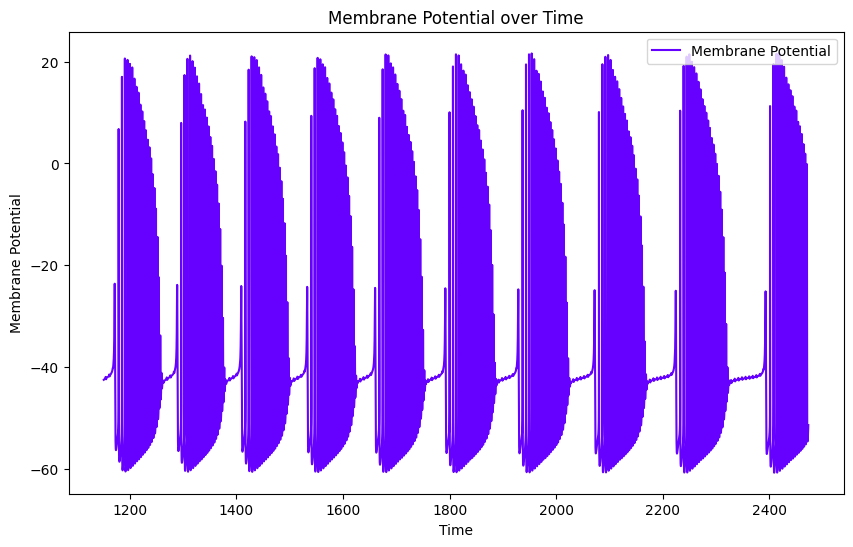

In [6]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
import numpy as np
from google.colab import files
from IPython.display import display

def read_data(file_path):
    """Reads data from a text file and returns two numpy arrays: time and membrane potential."""
    time, membrane_potential = np.loadtxt(file_path, unpack=True)
    return time, membrane_potential

def plot_data(time, membrane_potential, start_index, end_index, line_style, line_color, show_grid, x_scale, y_scale,
              x_label, y_label, title, marker_style, show_legend):
    """Plots the membrane potential for the selected range."""
    plt.figure(figsize=(10, 6))
    plt.plot(time[start_index:end_index], membrane_potential[start_index:end_index],
             line_style, color=line_color, label='Membrane Potential', marker=marker_style)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.xscale(x_scale)
    plt.yscale(y_scale)
    plt.grid(show_grid)
    if show_legend:
        plt.legend()
    plt.show()

def save_plot(time, membrane_potential, start_index, end_index, line_style, line_color, show_grid, x_scale, y_scale,
              x_label, y_label, title, marker_style, show_legend, file_name='plot.png'):
    """Saves the plot as an image file and offers it for download."""
    plt.figure(figsize=(10, 6))
    plt.plot(time[start_index:end_index], membrane_potential[start_index:end_index],
             line_style, color=line_color, label='Membrane Potential', marker=marker_style)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.xscale(x_scale)
    plt.yscale(y_scale)
    plt.grid(show_grid)
    if show_legend:
        plt.legend()
    plt.savefig(file_name)
    files.download(file_name)

# Upload the file
uploaded = files.upload()

# Assuming you upload one file, get the name of the file
file_name = next(iter(uploaded))

# Read and plot the data
time, membrane_potential = read_data(file_name)
max_index = len(time)

# Widgets for customization
range_slider = widgets.IntRangeSlider(value=[0, max_index], min=0, max=max_index, step=1, description='Range:', continuous_update=False)
line_style_selector = widgets.Dropdown(options=['-', '--', '-.', ':'], value='-', description='Line Style:')
line_color_selector = widgets.ColorPicker(value='blue', description='Line Color:')
grid_toggle = widgets.Checkbox(value=False, description='Show Grid')
x_scale_selector = widgets.Dropdown(options=['linear', 'log'], value='linear', description='X Scale:')
y_scale_selector = widgets.Dropdown(options=['linear', 'log'], value='linear', description='Y Scale:')
x_label_text = widgets.Text(value='Time', description='X Label:')
y_label_text = widgets.Text(value='Membrane Potential', description='Y Label:')
title_text = widgets.Text(value='Membrane Potential over Time', description='Title:')
marker_style_selector = widgets.Dropdown(options=['', '.', 'o', 's', '*', '+'], value='', description='Marker Style:')
legend_toggle = widgets.Checkbox(value=True, description='Show Legend')
save_button = widgets.Button(description='Save Plot')

# Display and interact with widgets
display_widgets = widgets.VBox([
    range_slider, line_style_selector, line_color_selector, grid_toggle,
    x_scale_selector, y_scale_selector, x_label_text, y_label_text, title_text,
    marker_style_selector, legend_toggle, save_button
])
display(display_widgets)

def on_save_button_clicked(b):
    save_plot(time, membrane_potential, range_slider.value[0], range_slider.value[1], line_style_selector.value,
              line_color_selector.value, grid_toggle.value, x_scale_selector.value, y_scale_selector.value,
              x_label_text.value, y_label_text.value, title_text.value, marker_style_selector.value, legend_toggle.value)

save_button.on_click(on_save_button_clicked)

widgets.interact(lambda range, line_style, line_color, show_grid, x_scale, y_scale, x_label, y_label, title, marker_style, show_legend:
                 plot_data(time, membrane_potential, range[0], range[1], line_style, line_color, show_grid, x_scale, y_scale,
                           x_label, y_label, title, marker_style, show_legend),
                 range=range_slider, line_style=line_style_selector, line_color=line_color_selector, show_grid=grid_toggle,
                 x_scale=x_scale_selector, y_scale=y_scale_selector, x_label=x_label_text, y_label=y_label_text, title=title_text,
                 marker_style=marker_style_selector, show_legend=legend_toggle)
